In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [6]:
mushroom_data = pd.read_csv('C:/Users/이주환/Desktop/SSU/2학기/AI와머신러닝/mushroom_project/mushrooms.csv')
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
mushroom_data.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [8]:
mushroom_data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
mushroom_data['population'].value_counts()

population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64

In [11]:
mushroom_data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
mushroom_target = mushroom_data['class']
mushroom_input = mushroom_data.drop(['class'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(mushroom_input, mushroom_target, train_size = 0.8, random_state=42, stratify = mushroom_target)

In [14]:
train_target.value_counts()

class
e    3366
p    3133
Name: count, dtype: int64

In [15]:
test_target.value_counts()

class
e    842
p    783
Name: count, dtype: int64

In [16]:
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

In [17]:
train_input_transf = ordinal_encoder.fit_transform(train_input)
test_input_transf = ordinal_encoder.fit_transform(test_input)

train_target_transf = label_encoder.fit_transform(train_target)
test_target_transf = label_encoder.fit_transform(test_target)

In [18]:
train_input_transf

array([[2., 3., 9., ..., 1., 5., 1.],
       [5., 2., 5., ..., 7., 1., 6.],
       [0., 2., 3., ..., 7., 3., 1.],
       ...,
       [2., 0., 8., ..., 2., 0., 1.],
       [5., 0., 3., ..., 3., 5., 0.],
       [2., 0., 4., ..., 3., 4., 0.]])

In [19]:
train_target_transf

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
test_input_transf.dtype

dtype('float64')

In [21]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_input_transf)
train_input_rescaled = scaling.transform(train_input_transf)

In [22]:
C = 1.0
svc = svm.SVC(kernel='linear',C=C).fit(train_input_rescaled, train_target_transf)

In [23]:
test_pred_target = svc.predict(scaling.transform(test_input_transf))

In [24]:
test_pred_target

array([1, 1, 0, ..., 0, 0, 0])

In [25]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_input_transf)

In [26]:
train_input_rescaled = scaling.transform(train_input_transf)

In [27]:
train_input_rescaled

array([[-0.2       ,  1.        ,  1.        , ..., -0.75      ,
         1.        , -0.66666667],
       [ 1.        ,  0.33333333,  0.11111111, ...,  0.75      ,
        -0.6       ,  1.        ],
       [-1.        ,  0.33333333, -0.33333333, ...,  0.75      ,
         0.2       , -0.66666667],
       ...,
       [-0.2       , -1.        ,  0.77777778, ..., -0.5       ,
        -1.        , -0.66666667],
       [ 1.        , -1.        , -0.33333333, ..., -0.25      ,
         1.        , -1.        ],
       [-0.2       , -1.        , -0.11111111, ..., -0.25      ,
         0.6       , -1.        ]])

In [28]:
scv = svm.SVC(kernel="linear", C=C).fit(train_input_rescaled, train_target_transf)

In [29]:
test_pred_target = scv.predict(scaling.transform(test_input_transf))

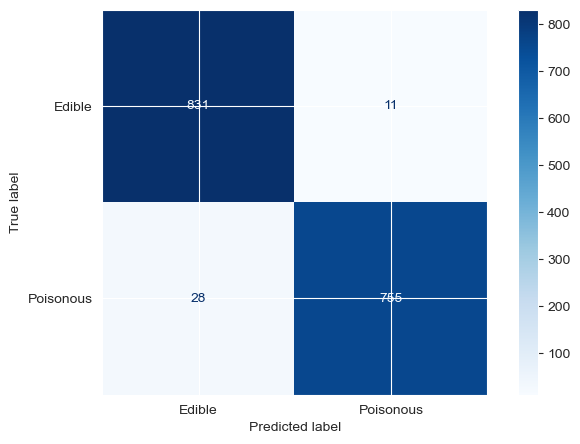

In [30]:
fix, ax = plt.subplots(figsize=(8,5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(test_target_transf, test_pred_target),
    display_labels=["Edible", "Poisonous"])
cmp.plot(ax=ax, cmap='Blues')

In [31]:
print(classification_report(test_target_transf, test_pred_target, target_names=["Edible","Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.97      0.99      0.98       842
   Poisonous       0.99      0.96      0.97       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [32]:
C = 1.0
svc = svm.SVC(kernel="linear",C=C).fit(train_input_rescaled, train_target_transf)

In [33]:
y_pred_test = svc.predict(scaling.transform(test_input_transf))

In [34]:
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [35]:
parameter_tuned = [
    {"kernel":["linear"], 'C':[1,10]},
    {"kernel":['poly'],'C':[1,10]},
    {"kernel":['rbf'],'gamma':[1e-3,1e-4],'C':[1,10]}
]

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

def tuned(result) :
    means = result['mean_test_score']
    stds = result['std_test_score']
    best_params = result['params'][means.argmax()]
    
    print('최적의 파라미터 : {}\n'.format(best_params))
    print('평균 테스트 점수 : {}\n'.format(round(means.mean(), 3)))
    print('Std test score: {}'.format(round(stds.mean(),3)))
    
    for mean, std, params in zip(means, stds, result['params']) :
        print('{} (x-/{}) for {}'.format(round(mean,3), round(std*2,3),params))
    
gcv = GridSearchCV(svm.SVC(), parameter_tuned, cv=5)
gcv.fit(train_input_rescaled, train_target_transf)
tuned(gcv.cv_results_)

최적의 파라미터 : {'C': 1, 'kernel': 'poly'}

평균 테스트 점수 : 0.952

Std test score: 0.003
0.956 (x-/0.009) for {'C': 1, 'kernel': 'linear'}
0.982 (x-/0.01) for {'C': 10, 'kernel': 'linear'}
1.0 (x-/0.0) for {'C': 1, 'kernel': 'poly'}
1.0 (x-/0.0) for {'C': 10, 'kernel': 'poly'}
0.923 (x-/0.007) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.886 (x-/0.01) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.945 (x-/0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.923 (x-/0.007) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
